# Topics

## Cumulative Historical

### 1849-1875:
+ 7,"king, verse, babylon, nation, iron, dream"
+ 8,"rome, government, europe, france, nation, england"
+ 9,"thee, satan, rich, peace, sorrow, trial"
+ 12,"country, york, society, catholic, dollar, million"
+ 13,"adam, resurrection, existence, immortality, dust, immortal"
+ 15,"prophecy, beast, sign, event, period, vision"
+ 18,"sunday, argument, institution, statement, keeping, observance"
+ 22,"wicked, salvation, righteous, righteousness, sinner, apostle"
+ 23,"throne, devil, david, wicked, king, luke"

health/character
+ 1,"religion, principle, character, moral, religious, woman"
+ 5,"tobacco, disease, habit, food, appetite, poison"
+ 10,"food, bread, fruit, meat, meal, salt"
+ 17,"disease, dress, patient, cold, treatment, physician"


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import GoH.modeldata
import GoH.modelviz
import GoH.utilities
import gspread
import matplotlib
from oauth2client.service_account import ServiceAccountCredentials
import os
import pandas as pd

In [3]:
scope = ['https://spreadsheets.google.com/feeds']
credentials = ServiceAccountCredentials.from_json_keyfile_name('/Users/jeriwieringa/Dissertation/drafts/code/secrets/dissertation-881847769b13.json', scope)

gc = gspread.authorize(credentials)

In [4]:
colors = ['#4e79a7', '#f28e2b', '#b07aa1']

In [5]:
def create_piechart(df, topic_id, colors):
    return df.groupby('match?')['doc_id'].agg(pd.Series.nunique).plot(kind='pie', 
                                                             colors=colors, 
                                                             shadow=True, 
                                                             startangle=90, 
                                                             autopct='%.2f%%',
                                                             title='Percentage of Top 30 Docs from \n Cumulative Historical Period \n 1849-1875 Model that "Match" Topic {}'.format(topic_id)
                                                            )

In [6]:
%matplotlib inline
matplotlib.style.use('fivethirtyeight')

In [7]:
base_dir = "/Users/jeriwieringa/Dissertation/drafts/data/module-3/"
model_scheme = "cumulative_historical_period"
period = "1849-to-1875"

In [8]:
labels = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_topicLabels.csv'.format(model_scheme, period)))

In [9]:
# Topics to filter by
topics = [7,8,9,12,13,15,18,22,23,1,5,10,17]

In [10]:
df = GoH.modeldata.model_to_df(base_dir, model_scheme, period )

In [11]:
df_filtered = GoH.modeldata.filter_dataframe_by_dates(df, 1859, 1870)

## Time Series

In [12]:
time_series = GoH.modeldata.topic_series(df, ['year', 'topic_id'], labels)

In [13]:
ts = time_series[time_series['topic_id'].isin(topics)]

In [14]:
ts = ts.pivot('year', 'topic_words', 'normalized_weight')

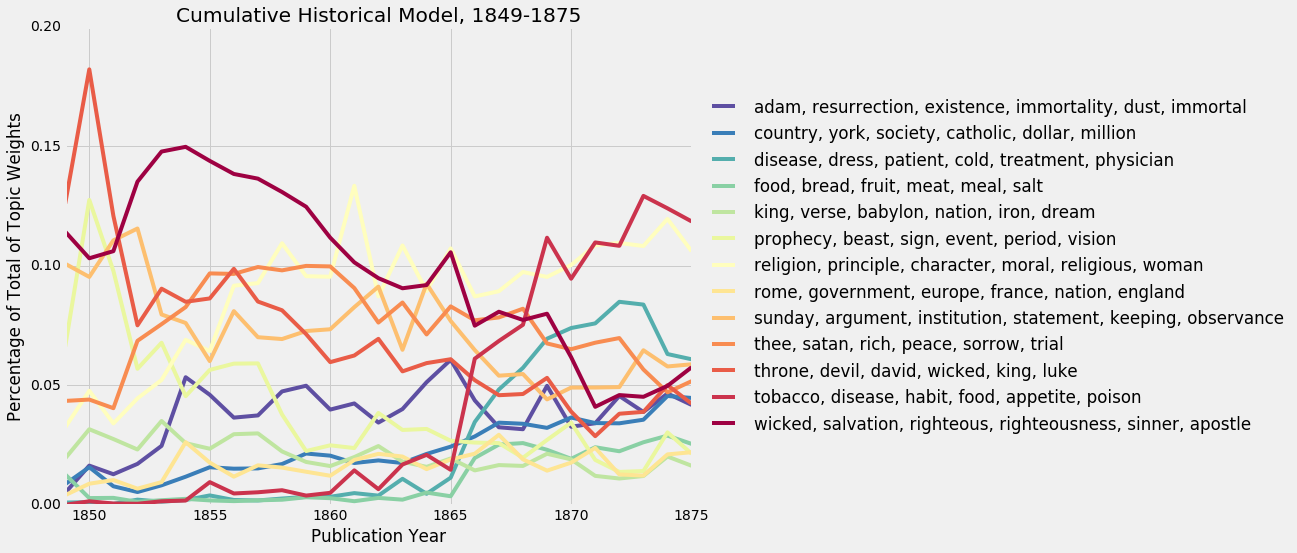

In [15]:
matplotlib.pyplot.figure()
ax = ts.plot(figsize=(10,8), colormap='Spectral_r', title='Cumulative Historical Model, 1849-1875')
ax.set_xlabel("Publication Year")
ax.set_ylabel("Percentage of Total of Topic Weights")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Review Docs

In [16]:
wtm = pd.read_csv(os.path.join(base_dir, 'dataframes', 'final', '{}-{}_wtm.csv'.format(model_scheme, period)))

In [17]:
dts = gc.open('EvaluateCorpus')
worksheet = dts.get_worksheet(2)

scores = pd.DataFrame(worksheet.get_all_records())

### 22,"wicked, salvation, righteous, righteousness, sinner, apostle"

In [18]:
t22 = wtm[wtm['topic_id'] == 22]

In [19]:
print(', '.join(t22['token'].tolist()))

wicked, salvation, righteous, righteousness, sinner, apostle, jesus_christ, hath, glorious, everlasting, darkness, reward, lamb, eternal_life, wrath, saved, forever, behold, enter, thee


Hypothesis: Description of second coming

In [20]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 22)

In [21]:
df22 = scores[scores['topic'] == 22]

In [22]:
df22

,description,doc_id,match?,topic
1,events of resurrection and judgment; righteous...,RH18671105-V30-21-page3.txt,yes,22
2,poem on heaven; sermon on gospel,RH18671210-V30-26-page1.txt,yes,22
3,sermon on Jesus preparing a place for the disc...,RH18691214-V34-25-page1.txt,yes,22
4,"sermon on gospel, the way to obtain mercy",RH18670416-V29-19-page2.txt,yes,22
5,what is known about death and resurrection,RH18700104-V35-02-page1.txt,yes,22
6,poem on second coming; argument that eternal l...,RH18600315-V15-17-page1.txt,yes,22
7,argument for conditional immortality,RH18590929-V14-19-page1.txt,yes,22
8,argument against universal salvation,RH18690907-V34-11-page1.txt,yes,22
9,sermon on hell,RH18690615-V33-25-page1.txt,yes,22
10,"sermon on the human struggle against ""lusts of...",RH18670319-V29-15-page1.txt,yes,22


Conclusion: The Judgment and Second Coming

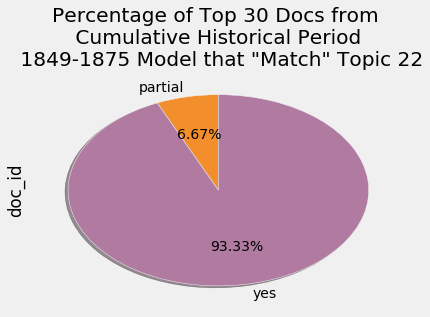

In [23]:
create_piechart(df22, 22, colors[1:])

### 1,"religion, principle, character, moral, religious, woman"

In [24]:
t1 = wtm[wtm['topic_id'] == 1]

In [25]:
print(', '.join(t1['token'].tolist()))

religion, principle, character, moral, religious, woman, self, wrong, action, object, conscience, rule, crime, practice, respect, justice, christianity, example, human, purpose


Hypothesis: Development of Christian virtues

In [26]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 1)

In [27]:
df1 = scores[scores['topic'] == 1]

In [28]:
df1

,description,doc_id,match?,topic
32,danger of sending children to school too young...,HR18690301-V03-09-page10.txt,yes,1
33,petticoat as woman's badge of slavery and all ...,HR18700501-V04-11-page3.txt,yes,1
34,on the atonement: sources of embarassment in t...,RH18610806-V18-10-page2.txt,yes,1
35,oppression of boys at home leads to inequality...,HR18670901-V02-03-page14.txt,partial,1
36,"character combines virtue, religion, and knowl...",HR18661101-V01-04-page7.txt,yes,1
37,hardening ones heart through temper; indulging...,RH18610423-V17-23-page2.txt,yes,1
38,medical professions rejection of women further...,HR18700101-V04-07-page2.txt,partial,1
39,salvation requiring more than repentence but a...,RH18610903-V18-14-page2.txt,yes,1
40,advice for teacher on how to encourage develop...,YI18701101-V18-21-page7.txt,yes,1
41,slavery contrary to social relations sanctione...,RH18630210-V21-11-page1.txt,yes,1


Conclusions: Warnings against immortal behavior and prescriptions for the development of virtue.

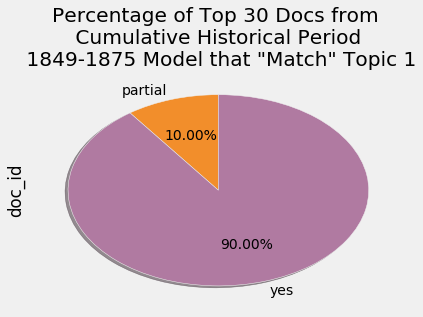

In [29]:
create_piechart(df1, 1, colors[1:])

### 9,"thee, satan, rich, peace, sorrow, trial"

In [30]:
t9 = wtm[wtm['topic_id'] == 9]

In [31]:
print(', '.join(t9['token'].tolist()))

thee, satan, rich, peace, sorrow, trial, seek, self, temptation, pleasure, pray, treasure, suffering, fruit, lead, heavenly, parent, lost, mercy, honor


Hypothesis: Letters from readers offering testimony and stating belief.

In [32]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 9)

In [33]:
df9 = scores[scores['topic'] == 9]

In [34]:
df9

,description,doc_id,match?,topic
63,testimony from EGW warning about the moral fai...,RH18630106-V21-06-page3.txt,yes,9
64,letter encouraging readers to persevere throug...,YI18590801-V07-08-page6.txt,yes,9
65,sermon from Loughborough on persevering throug...,RH18671217-V31-01-page2.txt,yes,9
66,"letter to readers encouraging them to ""make Je...",YI18700901-V18-17-page2.txt,partial,9
67,sermon on health and sickness as the result of...,RH18661225-V29-03-page1.txt,partial,9
68,sermon on sympathies as indication of ones sta...,RH18700111-V35-03-page3.txt,yes,9
69,"remarks from EGW on the Christian life, the ne...",RH18700329-V35-15-page2.txt,yes,9
70,letters to children readers on finding strengt...,YI18600401-V08-04-page2.txt,yes,9
71,letters to children readers on following Jesus...,YI18600201-V08-02-page2.txt,yes,9
72,letters to children readers on persevering; st...,YI18600701-V08-07-page2.txt,yes,9


Conclusion: Exhortations on Christian Character and Perseverance. 

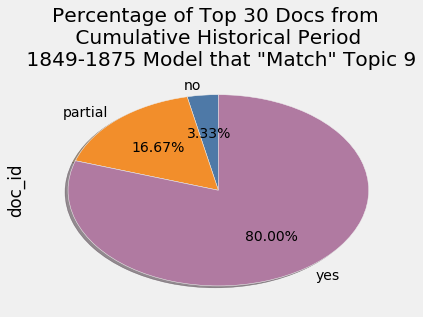

In [35]:
create_piechart(df9, 9, colors)

### 5,"tobacco, disease, habit, food, appetite, poison"

In [36]:
t5 = wtm[wtm['topic_id'] == 5]

In [37]:
print(', '.join(t5['token'].tolist()))

tobacco, disease, habit, food, appetite, poison, psalm, stomach, animal, effect, physical, medicine, action, blood, physician, brain, drug, organ, mental, reformer


Hypothesis: Description of the principles and effectiveness of Health Reform.

In [38]:
# GoH.modeldata.evaluate_topic_docs(df_filtered, 5)

In [39]:
df5 = scores[scores['topic'] == 5]

In [40]:
df5

,description,doc_id,match?,topic
94,importance of digestive health; principles of ...,HR18661101-V01-04-page5.txt,yes,5
95,"argument against ""vital action"" as ""chemical a...",HR18681201-V03-06-page8.txt,yes,5
96,Outline of Bionomy; organization of organic sy...,HR18690201-V03-08-page10.txt,yes,5
97,nutrition from whole cell-structures; disease ...,HR18670701-V02-01-page4.txt,yes,5
98,exercise needed in proportion - what is not us...,HR18700201-V04-08-page14.txt,yes,5
99,"description of dyspepsia, its symptoms and tre...",HR18700401-V04-10-page8.txt,yes,5
100,people violate laws of health in the types of ...,HR18671201-V02-06-page8.txt,yes,5
101,alcohol not a treatment for snake bites; funda...,HR18700601-V04-12-page3.txt,yes,5
102,disease from overeating,HR18670501-V01-10-page2.txt,yes,5
103,animal meat rejected because domesticated anim...,HR18680501-V02-11-page8.txt,yes,5


Conclusion: Health Reform

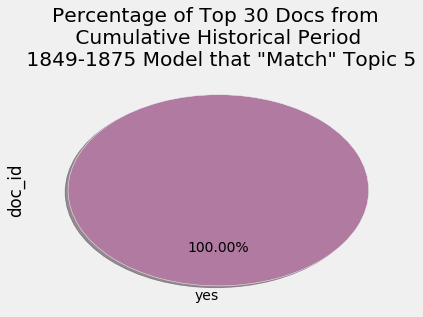

In [41]:
create_piechart(df5, 5, colors[2:])